# Ad Types

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

The big question in this report is, which Ad Type worked the best? Which ad would generate the most impressions, clicks, or views based on the money we put in?

This report, is honestly just a lot of data cleaning, and then displaying cost effectiveness at the end, so bear with me as we go throug this report.

In [2]:
ytdf = pd.read_csv("data/ytdata_medium.csv")
fbdf = pd.read_csv("data/fbdata_medium.csv")

In [3]:
ytdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Final URL                122 non-null    object 
 1   Headline                 122 non-null    object 
 2   Long headline            122 non-null    object 
 3   Headline 1               122 non-null    object 
 4   Headline 2               122 non-null    object 
 5   Headline 3               122 non-null    object 
 6   Headline 4               122 non-null    object 
 7   Headline 5               122 non-null    object 
 8   Headline 6               122 non-null    object 
 9   Headline 7               122 non-null    object 
 10  Headline 8               122 non-null    object 
 11  Headline 9               122 non-null    object 
 12  Headline 10              122 non-null    object 
 13  Headline 11              122 non-null    object 
 14  Headline 12              1

In [4]:
fbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ad name                           3 non-null      object 
 1   Delivery status                   3 non-null      object 
 2   Delivery level                    3 non-null      object 
 3   Reach                             3 non-null      int64  
 4   Impressions                       3 non-null      int64  
 5   Frequency                         3 non-null      float64
 6   Attribution setting               3 non-null      object 
 7   Result type                       3 non-null      object 
 8   Results                           3 non-null      int64  
 9   Amount spent (USD)                3 non-null      float64
 10  Cost per result                   3 non-null      float64
 11  Starts                            3 non-null      object 
 12  Ends        

In [5]:
#sanitize
valid = '1234567890.' #valid characters for a float
def sanitize(data):
    if(data== " --"):
        return np.nan
    return float(''.join(filter(lambda char: char in valid, data)))

ytdf['Clicks'] = ytdf['Clicks'].apply(sanitize)
ytdf['Impr.'] = ytdf['Impr.'].apply(sanitize)
ytdf['Views'] = ytdf['Views'].apply(sanitize)

In [6]:
ytdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Final URL                122 non-null    object 
 1   Headline                 122 non-null    object 
 2   Long headline            122 non-null    object 
 3   Headline 1               122 non-null    object 
 4   Headline 2               122 non-null    object 
 5   Headline 3               122 non-null    object 
 6   Headline 4               122 non-null    object 
 7   Headline 5               122 non-null    object 
 8   Headline 6               122 non-null    object 
 9   Headline 7               122 non-null    object 
 10  Headline 8               122 non-null    object 
 11  Headline 9               122 non-null    object 
 12  Headline 10              122 non-null    object 
 13  Headline 11              122 non-null    object 
 14  Headline 12              1

In [7]:
ytdf = ytdf.groupby("Format").sum()
ytdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, text to video
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Clicks  2 non-null      float64
 1   Impr.   2 non-null      float64
 2   Views   2 non-null      float64
 3   Cost    2 non-null      float64
dtypes: float64(4)
memory usage: 80.0+ bytes


In [8]:
def cpc(row):
    if(row['Clicks']==0):
        return -1 
    return row['Cost']/row['Clicks']

def cpm(row):
    if(row['Impr.']==0):
        return -1 
    return row['Cost']/(row['Impr.']/1000)

def cpv(row):
    if(row['Views']==0):
        return -1 
    return row['Cost']/row['Views']

def ctr(row):
    if(row['Impr.']==0):
        return -1 
    return row['Clicks']/row['Impr.']

def cpcv(row):
    if(row['Conversions']==0):
        return -1 
    return row['Cost']/row['Conversions']


ytdf['CPC'] = ytdf.apply(lambda row: cpc(row), axis=1)
ytdf['CPM'] = ytdf.apply(lambda row: cpm(row), axis=1)
ytdf['CPV'] = ytdf.apply(lambda row: cpv(row), axis=1)
ytdf['CTR'] = ytdf.apply(lambda row: ctr(row), axis=1)
ytdf = ytdf.reset_index(level=0)

## Look Here!

This is our first big comparison; **did text ads or video ads do better**?
As you can see, the CPC for text ads were much lower, but the CPM for video ads were significantly lower. Depending on which metric you value more for your campaign, you can come to two very different conclusions, or find somewhere in between.

In [9]:
ytdf.head()

,Format,Clicks,Impr.,Views,Cost,CPC,CPM,CPV,CTR
0,text,1047.0,17449.0,0.0,2530.86,2.417249,145.043269,-1.000000,0.060003
1,video,6457.0,2310036.0,286489.0,41267.55,6.391134,17.864462,0.144046,0.002795


We will also plot it out for you to visualize the difference in CPC and CPM

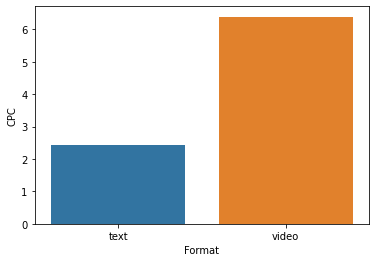

In [10]:
fig, ax = plt.subplots()

ax = sns.barplot(x = "Format", y = "CPC", data = ytdf)


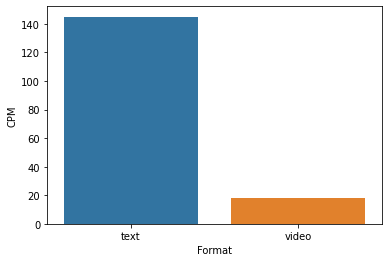

In [11]:
ax = sns.barplot(x = "Format", y = "CPM", data = ytdf)

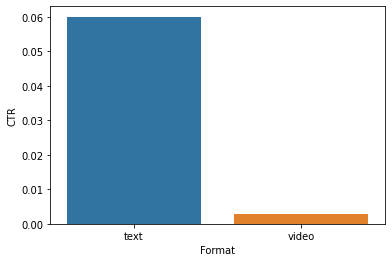

In [12]:
ax = sns.barplot(x = "Format", y = "CTR", data = ytdf)

In [13]:
ytdf2 = pd.read_csv("data/yt_network_condensed.csv")

In [14]:
ytdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Network (with search partners)  6 non-null      object 
 1   Campaign status                 6 non-null      object 
 2   Campaign                        0 non-null      float64
 3   Budget name                     0 non-null      float64
 4   Currency code                   6 non-null      object 
 5   Budget                          0 non-null      float64
 6   Budget type                     0 non-null      float64
 7   Status                          0 non-null      float64
 8   Status reasons                  0 non-null      float64
 9   Optimization score              0 non-null      float64
 10  Campaign type                   0 non-null      float64
 11  Avg. CPM                        6 non-null      object 
 12  Cost                            6 non-nu

In [15]:
#sanitize
valid = '1234567890.' #valid characters for a float
def sanitize(data):
    if(data== " --"):
        return np.nan
    return float(''.join(filter(lambda char: char in valid, data)))

ytdf2['Impr.'] = ytdf2['Impr.'].apply(sanitize)
ytdf2['Interactions'] = ytdf2['Interactions'].apply(sanitize)

In [16]:
ytdf2 = ytdf2.groupby("Network (with search partners)").sum()
ytdf2 = ytdf2[["Cost", "Impr.", "Interactions", "Conversions"]]

In [17]:
ytdf2['CPM'] = ytdf2.apply(lambda row: cpm(row), axis=1)
ytdf2['Cost/Conv.'] = ytdf2.apply(lambda row: cpcv(row), axis=1)
ytdf2 = ytdf2.reset_index(level=0)

## A More Detailed Look At Things

Here, we not only compare text and video, but also how exactly the ads are displayed. In the dataframe below, you can see the 5 different ways our ads were distributed, as well as their impressions, interactions, costs, etc.

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(ytdf2)

  Network (with search partners)      Cost      Impr.  Interactions  \
0                  Cross-network      0.00        0.0           0.0   
1         Google Display Network  27495.22  9498645.0      191515.0   
2                  Google search   2509.74    15504.0        1036.0   
3                Search partners     21.12     1945.0          11.0   
4                 YouTube Search      0.13       81.0           3.0   
5                 YouTube Videos  41141.77  2297150.0      579811.0   

   Conversions         CPM  Cost/Conv.  
0         0.00   -1.000000   -1.000000  
1        98.58    2.894647  278.912761  
2       242.42  161.876935   10.352859  
3         2.00   10.858612   10.560000  
4         0.00    1.604938   -1.000000  
5        84.00   17.909919  489.782976  


As always, we will create graphs for CPC and CPM so that it is easier for you to visualize the differences.
To interpret this graph, the lower the bar is, the better it does, since there is a much lower cost.

As you can tell, Google Search does *terribly* for CPM, but it also has the best Cost/Conv.
On the flip side, Google Display has the best CPM out of those that have a valid Const/Conv., but its Const/Conv. is abominable.

YouTube Videos had both a high CPM and Const/Conv. :(

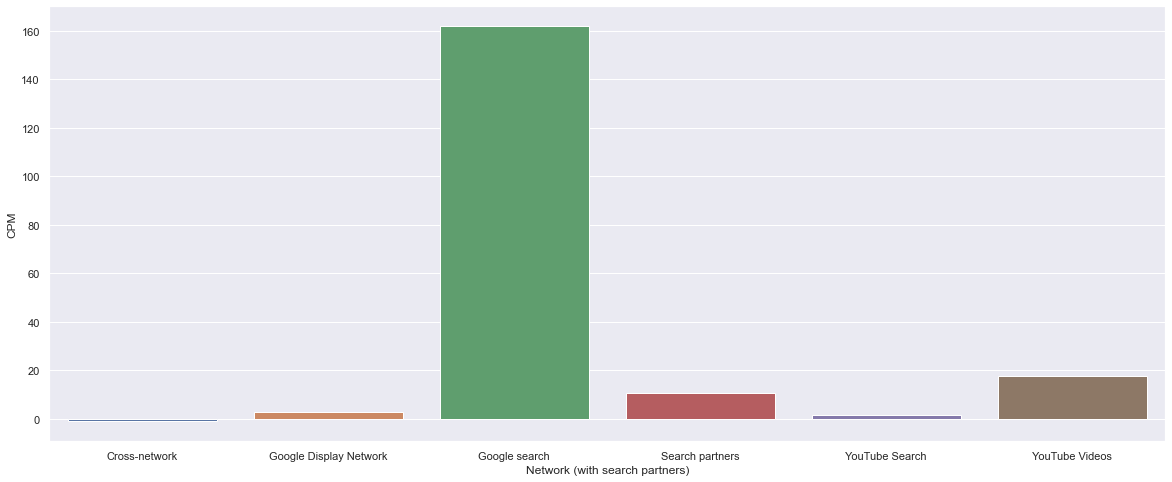

In [20]:
fig2, ax2 = plt.subplots()
sns.set(rc = {'figure.figsize':(20,8)})
ax2 = sns.barplot(x = "Network (with search partners)", y = "CPM", data = ytdf2)

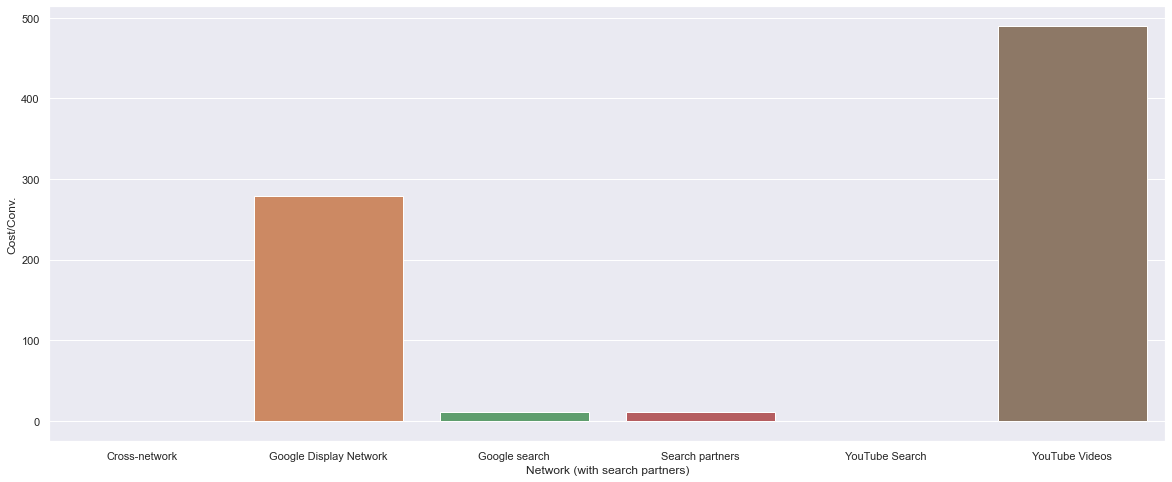

In [21]:
ax2 = sns.barplot(x = "Network (with search partners)", y = "Cost/Conv.", data = ytdf2)